In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from causalgraphicalmodels import CausalGraphicalModel
from IPython.display import Image
from causalnex.plots import plot_structure, NODE_STYLE, EDGE_STYLE
from causalnex.structure.notears import from_pandas, from_pandas_lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectFromModel
import networkx as nx

%matplotlib inline

C:\Users\hp\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\hp\anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\hp\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:\n%s" %


In [252]:
from causalnex.network import BayesianNetwork
from causalnex.network.sklearn import BayesianNetworkClassifier
from causalnex.structure.notears import from_pandas
from causalnex.utils.network_utils import get_markov_blanket
from causalnex.structure.notears import from_pandas, from_pandas_lasso
from causalnex.discretiser.discretiser_strategy import ( DecisionTreeSupervisedDiscretiserMethod )

In [2]:
import pygraphviz

In [207]:
data1 = pd.read_csv('../data/df_causal.csv',index_col=False)
data1

,diagnosis,concave points_worst,concave points_se,symmetry_se,radius_se,concavity_mean,smoothness_worst,smoothness_se,area_mean,area_se
0,1,0.2654,0.01587,0.03003,1.0950,0.30010,0.16220,0.006399,1001.0,153.40
1,1,0.1860,0.01340,0.01389,0.5435,0.08690,0.12380,0.005225,1326.0,74.08
2,1,0.2430,0.02058,0.02250,0.7456,0.19740,0.14440,0.006150,1203.0,94.03
3,1,0.2575,0.01867,0.05963,0.4956,0.24140,0.20980,0.009110,386.1,27.23
4,1,0.1625,0.01885,0.01756,0.7572,0.19800,0.13740,0.011490,1297.0,94.44
...,...,...,...,...,...,...,...,...,...,...
564,1,0.2216,0.02454,0.01114,1.1760,0.24390,0.14100,0.010300,1479.0,158.70
565,1,0.1628,0.01678,0.01898,0.7655,0.14400,0.11660,0.005769,1261.0,99.04
566,1,0.1418,0.01557,0.01318,0.4564,0.09251,0.11390,0.005903,858.1,48.55
567,1,0.2650,0.01664,0.02324,0.7260,0.35140,0.16500,0.006522,1265.0,86.22


In [176]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
data1[['concave points_worst', 'concave points_se', 'symmetry_se', 'radius_se', 'concavity_mean', 'smoothness_worst', 'smoothness_se', 'area_mean', 'area_se']] = min_max_scaler.fit_transform(data1[['concave points_worst', 'concave points_se', 'symmetry_se', 'radius_se', 'concavity_mean', 'smoothness_worst', 'smoothness_se', 'area_mean', 'area_se']])
data1

,diagnosis,concave points_worst,concave points_se,symmetry_se,radius_se,concavity_mean,smoothness_worst,smoothness_se,area_mean,area_se
0,1,0.912027,0.300625,0.311645,0.356147,0.703140,0.601136,0.159296,0.363733,0.273811
1,1,0.639175,0.253836,0.084539,0.156437,0.203608,0.347553,0.119387,0.501591,0.125660
2,1,0.835052,0.389847,0.205690,0.229622,0.462512,0.483590,0.150831,0.449417,0.162922
3,1,0.884880,0.353665,0.728148,0.139091,0.565604,0.915472,0.251453,0.102906,0.038155
4,1,0.558419,0.357075,0.136179,0.233822,0.463918,0.437364,0.332359,0.489290,0.163688
...,...,...,...,...,...,...,...,...,...,...
564,1,0.761512,0.464861,0.045843,0.385479,0.571462,0.461137,0.291906,0.566490,0.283710
565,1,0.559450,0.317863,0.156160,0.236828,0.337395,0.300007,0.137879,0.474019,0.172279
566,1,0.487285,0.294942,0.074548,0.124896,0.216753,0.282177,0.142435,0.303118,0.077976
567,1,0.910653,0.315211,0.216103,0.222524,0.823336,0.619626,0.163477,0.475716,0.148335


## Let's split the data into two part

In [177]:
random_df = data1.sample(frac=0.85,random_state=60)
random_df

,diagnosis,concave points_worst,concave points_se,symmetry_se,radius_se,concavity_mean,smoothness_worst,smoothness_se,area_mean,area_se
10,1,0.342784,0.143796,0.094529,0.097049,0.077296,0.309912,0.078730,0.277540,0.062959
81,0,0.586942,0.261981,0.189368,0.063190,0.273899,0.544344,0.172723,0.159703,0.011502
378,0,0.362199,0.158288,0.144903,0.010393,0.099555,0.371987,0.118945,0.185408,0.008495
207,1,0.376632,0.212730,0.211882,0.171754,0.162840,0.263686,0.113030,0.322715,0.115163
401,0,0.236289,0.110475,0.043311,0.050951,0.061059,0.437364,0.151681,0.126914,0.022690
...,...,...,...,...,...,...,...,...,...,...
546,0,0.081821,0.104092,0.108600,0.035814,0.023711,0.378591,0.182649,0.076946,0.011520
49,0,0.440550,0.224285,0.119998,0.044288,0.111317,0.297365,0.093211,0.177094,0.025024
141,1,0.417869,0.221065,0.152924,0.214883,0.221345,0.397742,0.171907,0.283987,0.125660
34,1,0.640550,0.171756,0.128722,0.080572,0.317245,0.484911,0.084033,0.281527,0.052723


In [178]:
data2= random_df[['concave points_worst', 'concave points_se', 'symmetry_se', 'radius_se', 'concavity_mean', 'smoothness_worst', 'smoothness_se', 'area_mean', 'area_se']]

In [45]:
data3= random_df[['diagnosis']]
data4 = pd.concat([data2,data3],axis=1, join="inner")
data4

,concave points_worst,concave points_se,symmetry_se,radius_se,concavity_mean,smoothness_worst,smoothness_se,area_mean,area_se,diagnosis
10,0.09975,0.007591,0.01460,0.3795,0.03299,0.1181,0.004029,797.8,40.51,1
81,0.17080,0.013830,0.02134,0.2860,0.11690,0.1536,0.006794,520.0,12.96,0
378,0.10540,0.008356,0.01818,0.1402,0.04249,0.1275,0.005212,580.6,11.35,0
207,0.10960,0.011230,0.02294,0.5858,0.06950,0.1111,0.005038,904.3,68.46,1
401,0.06876,0.005832,0.01096,0.2522,0.02606,0.1374,0.006175,442.7,18.95,0
...,...,...,...,...,...,...,...,...,...,...
546,0.02381,0.005495,0.01560,0.2104,0.01012,0.1285,0.007086,324.9,12.97,0
49,0.12820,0.011840,0.01641,0.2338,0.04751,0.1162,0.004455,561.0,20.20,0
141,0.12160,0.011670,0.01875,0.7049,0.09447,0.1314,0.006770,813.0,74.08,1
34,0.18640,0.009067,0.01703,0.3340,0.13540,0.1446,0.004185,807.2,35.03,1


C:\Users\hp\anaconda3\lib\site-packages\causalnex\structure\notears.py:395: RuntimeWarning: overflow encountered in double_scalars
  return loss + 0.5 * rho * h * h + alpha * h
C:\Users\hp\anaconda3\lib\site-packages\causalnex\structure\notears.py:411: RuntimeWarning: overflow encountered in multiply
  obj_grad = loss_grad + (rho * (np.trace(E) - d) + alpha) * E.T * W * 2
C:\Users\hp\anaconda3\lib\site-packages\causalnex\structure\notears.py:411: RuntimeWarning: invalid value encountered in multiply
  obj_grad = loss_grad + (rho * (np.trace(E) - d) + alpha) * E.T * W * 2
C:\Users\hp\anaconda3\lib\site-packages\causalnex\structure\notears.py:440: UserWarning: Failed to converge. Consider increasing max_iter.
  warnings.warn("Failed to converge. Consider increasing max_iter.")
C:\Users\hp\anaconda3\lib\site-packages\pygraphviz\agraph.py:1367: RuntimeWarning: Warning: node 'concave points_worst', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), Ru

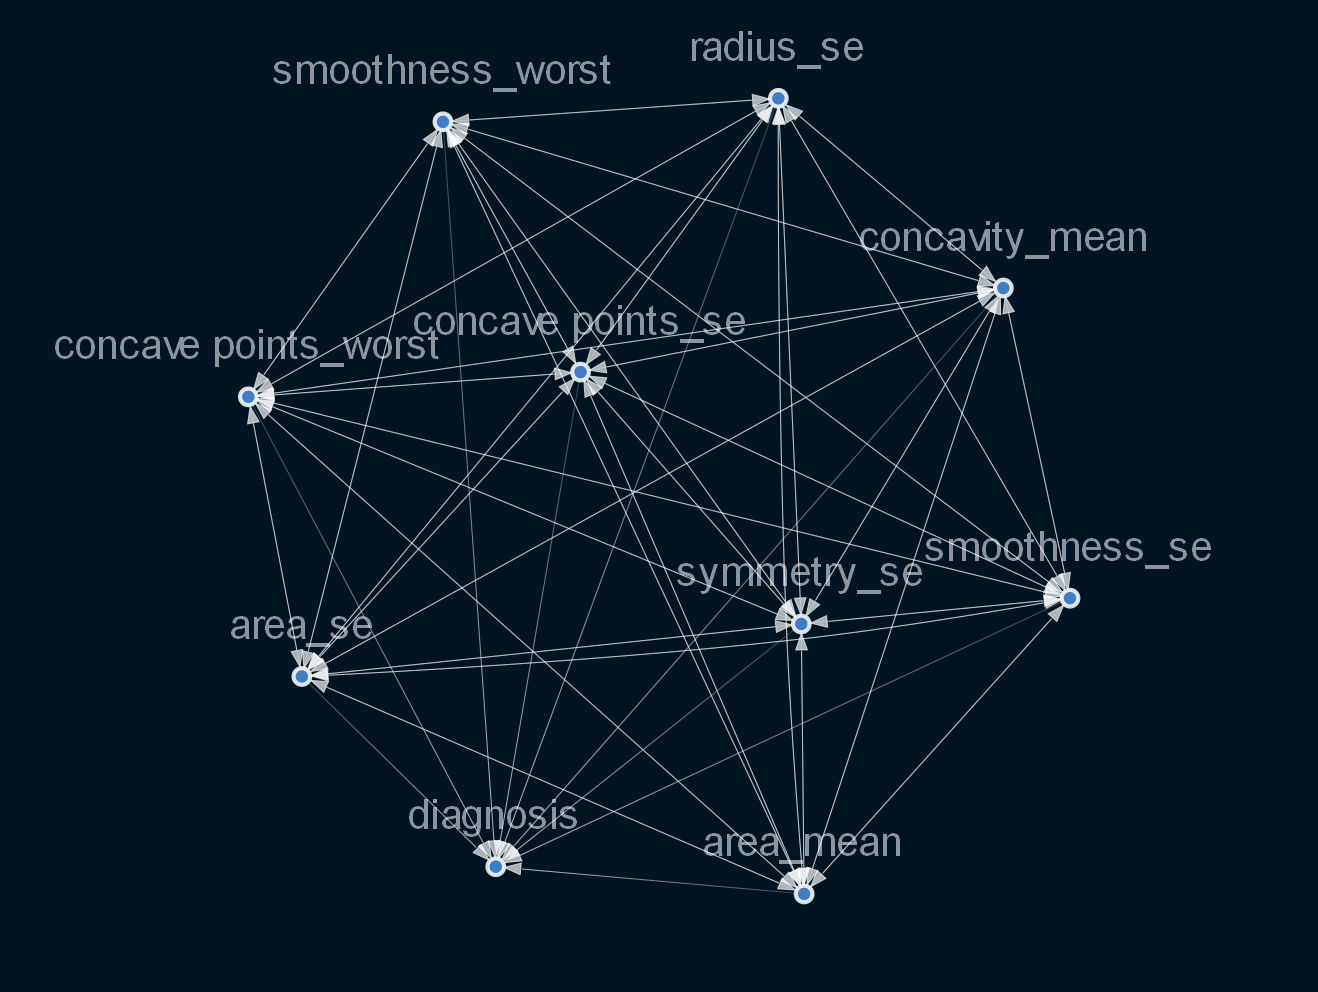

In [181]:

sm = from_pandas(data4, tabu_parent_nodes=['diagnosis'])
viz = plot_structure(
    sm,
    graph_attributes={"scale": "2"},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK)
Image(viz.draw(format='png'))

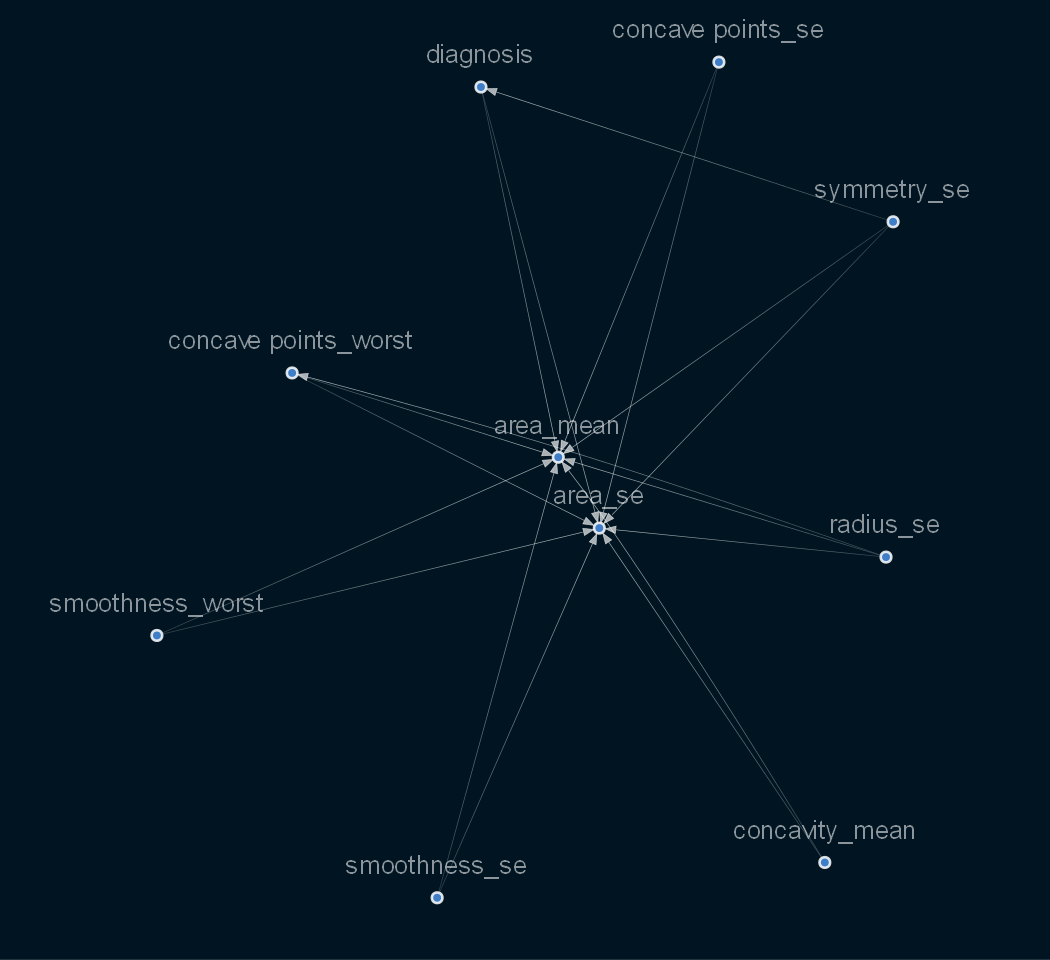

In [185]:
#remove edges with threshold below 0.8
sm.remove_edges_below_threshold(0.8)
viz = plot_structure(
    sm,
    graph_attributes={"scale": "2",'size':3.5},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK)
Image(viz.draw(format='png'))

The graph above showed us relationship among  the data training, and here we can notice that sysmetry_se have a direct relation with our target feature diagnosis and most of the features are have a direct effect on area_mean and area_se.

### Using Treshold

C:\Users\hp\anaconda3\lib\site-packages\causalnex\structure\notears.py:411: RuntimeWarning: invalid value encountered in multiply
  obj_grad = loss_grad + (rho * (np.trace(E) - d) + alpha) * E.T * W * 2
C:\Users\hp\anaconda3\lib\site-packages\causalnex\structure\notears.py:440: UserWarning: Failed to converge. Consider increasing max_iter.
  warnings.warn("Failed to converge. Consider increasing max_iter.")
C:\Users\hp\anaconda3\lib\site-packages\pygraphviz\agraph.py:1367: RuntimeWarning: Warning: node 'concave points_worst', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)
C:\Users\hp\anaconda3\lib\site-packages\pygraphviz\agraph.py:1367: RuntimeWarning: Warning: node 'concave points_worst', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


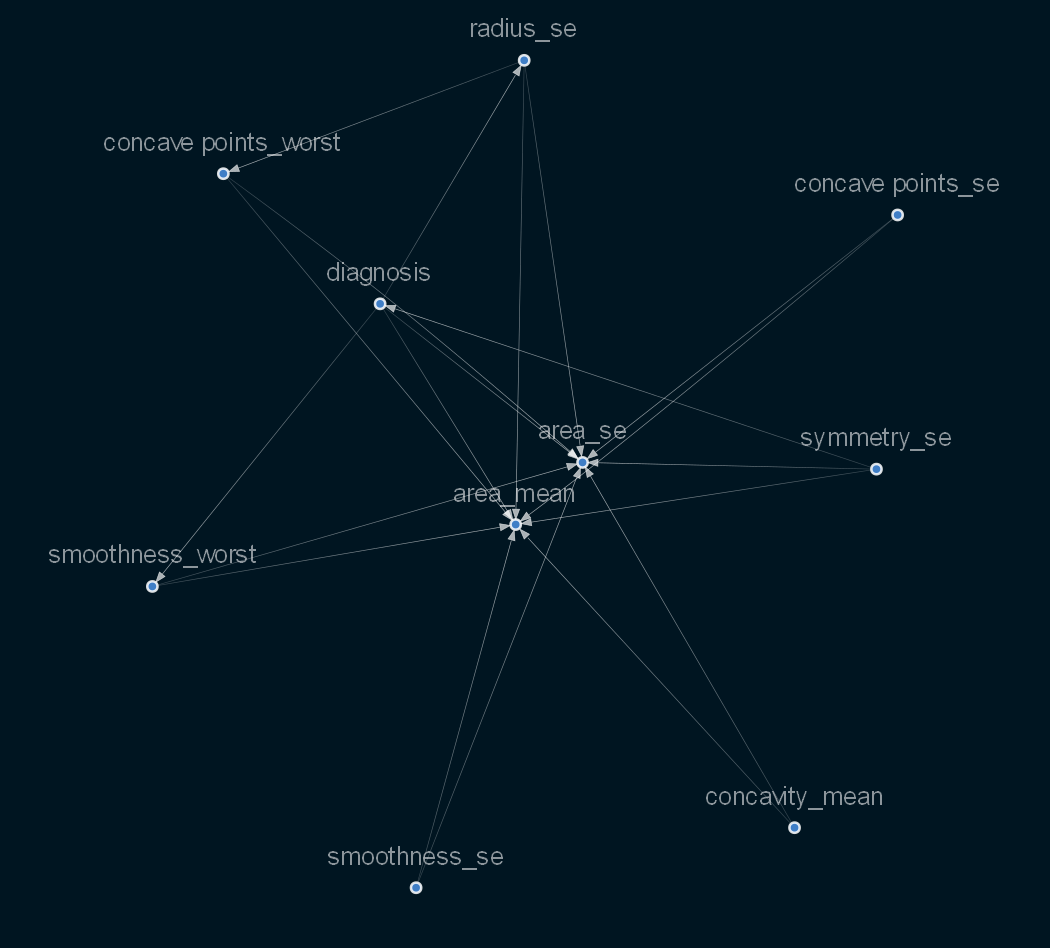

In [254]:
sm = from_pandas(data4, w_threshold=0.80)

viz = plot_structure(
    sm,
    graph_attributes={"scale": "2.0", 'size':3.5},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK)
Image(viz.draw(format='png'))

### Remove non sense arrow

C:\Users\hp\anaconda3\lib\site-packages\pygraphviz\agraph.py:1367: RuntimeWarning: Warning: node 'concave points_worst', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


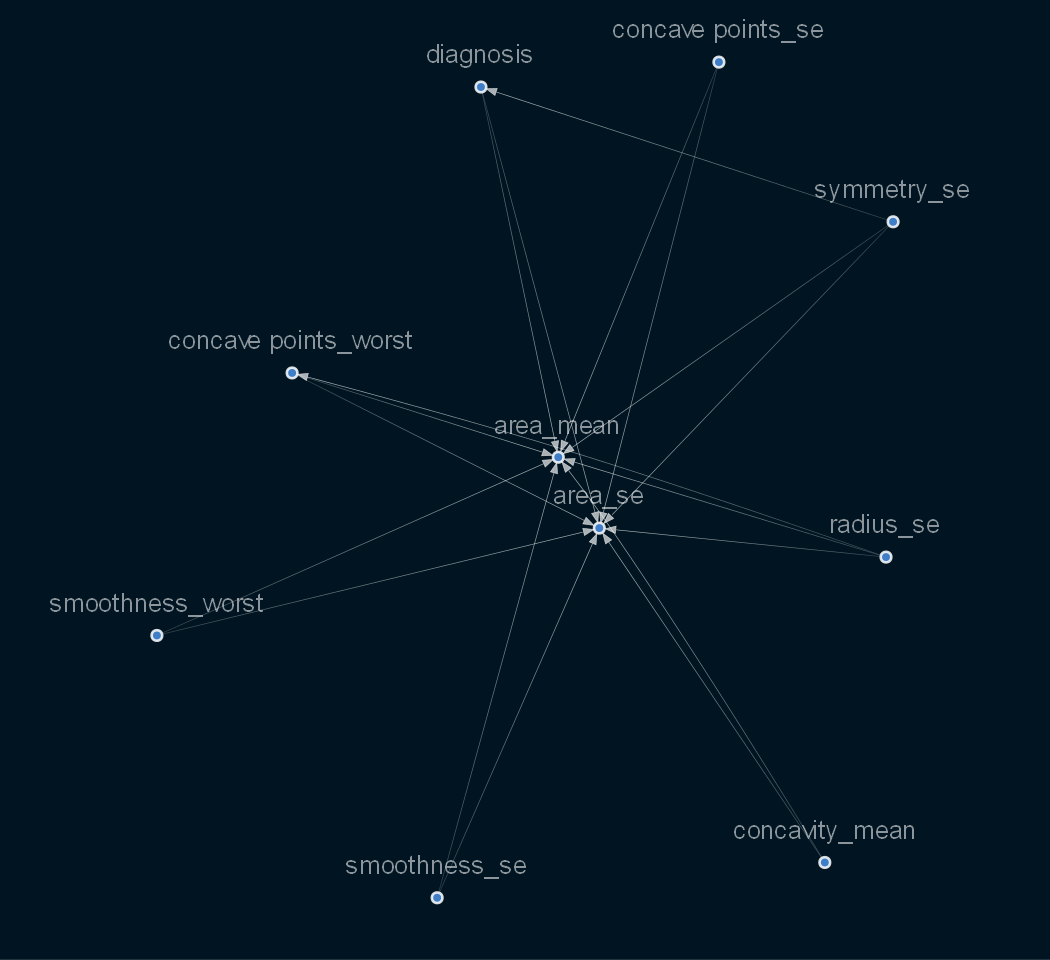

In [184]:

sm = from_pandas(data4, w_threshold=0.80)
sm.remove_edge("diagnosis", "radius_se")
sm.remove_edge("diagnosis", "smoothness_worst")
viz = plot_structure(
    sm,
    graph_attributes={"scale": "2.0", 'size':3.5},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK)
Image(viz.draw(format='png'))

Here also we observe the same things what ever the ajusted treshold .

## Let's add constraint to diagnosis without lasso regularization

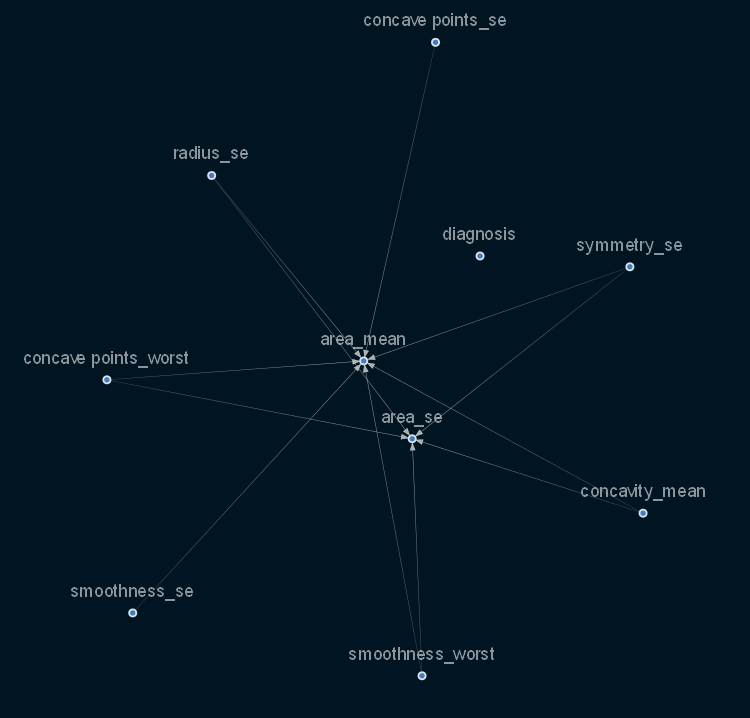

In [186]:

sm_constrained = from_pandas(data4, tabu_parent_nodes=['diagnosis'], w_threshold=0.8)
viz = plot_structure(
    sm_constrained,
    graph_attributes={"scale": "2.0", 'size':2.5},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK)
Image(viz.draw(format='png'))

## Constraint on diagnosis column with lasso regularization

C:\Users\hp\anaconda3\lib\site-packages\causalnex\structure\notears.py:492: RuntimeWarning: overflow encountered in double_scalars
  return loss + 0.5 * rho * h_val * h_val + alpha * h_val + beta * w_vec.sum()
C:\Users\hp\anaconda3\lib\site-packages\causalnex\structure\notears.py:518: RuntimeWarning: overflow encountered in multiply
  + (rho * (np.trace(exp_hdmrd) - d) + alpha) * exp_hdmrd.T * wmat * 2
C:\Users\hp\anaconda3\lib\site-packages\causalnex\structure\notears.py:518: RuntimeWarning: invalid value encountered in multiply
  + (rho * (np.trace(exp_hdmrd) - d) + alpha) * exp_hdmrd.T * wmat * 2
C:\Users\hp\anaconda3\lib\site-packages\causalnex\structure\notears.py:550: UserWarning: Failed to converge. Consider increasing max_iter.
  warnings.warn("Failed to converge. Consider increasing max_iter.")


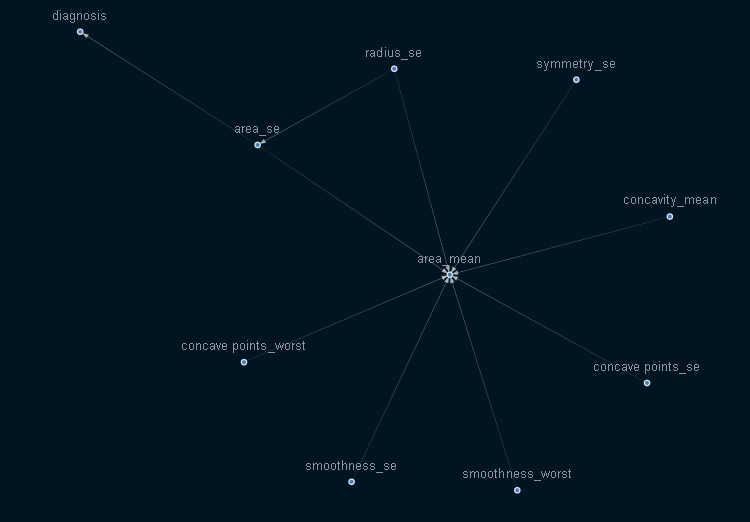

In [187]:


sm_lasso_constrained = from_pandas_lasso(data4, tabu_parent_nodes=['diagnosis'], w_threshold=0.8, beta=0.8)
viz = plot_structure(
    sm_lasso_constrained,
    graph_attributes={"scale": "2.0", 'size':2.5},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK)
Image(viz.draw(format='png'))

# Jaccard's similarity index
The Jaccard similarity index (sometimes called the Jaccard similarity coefficient) compares members for two sets to see which members are shared and which are distinct. It’s a measure of similarity for the two sets of data, with a range from 0% to 100%. The higher the percentage, the more similar the two populations. Although it’s easy to interpret, it is extremely sensitive to small samples sizes and may give erroneous results, especially with very small samples or data sets with missing observations.
## Case of  intersection

In [188]:
#similarity between a graph plotted without lasso regularization and one plotted with lasso regularization
def jaccard_similarity(g, h):
    i = set(g).intersection(h)
    return round(len(i) / (len(g) + len(h) - len(i)),3)

jaccard_similarity(sm_constrained.edges(), sm_lasso_constrained.edges())

0.571

It is weak, very wak the result obtained above , which also mean they are means 36.8% similar .

In [237]:

#Let's split the data
df_1 = data1.iloc[:90,:]
df_2 = data1.iloc[:300,:]
df_3 =data1.iloc[:420,:]
df_4 = data1.iloc[:,:]

In [209]:
def Jaccar_score(g, h):    
    i = set(g).intersection(set(h))
    u = set(g).union(set(h))
    return len(i) / float(len(u))

C:\Users\hp\anaconda3\lib\site-packages\causalnex\structure\notears.py:492: RuntimeWarning: invalid value encountered in double_scalars
  return loss + 0.5 * rho * h_val * h_val + alpha * h_val + beta * w_vec.sum()


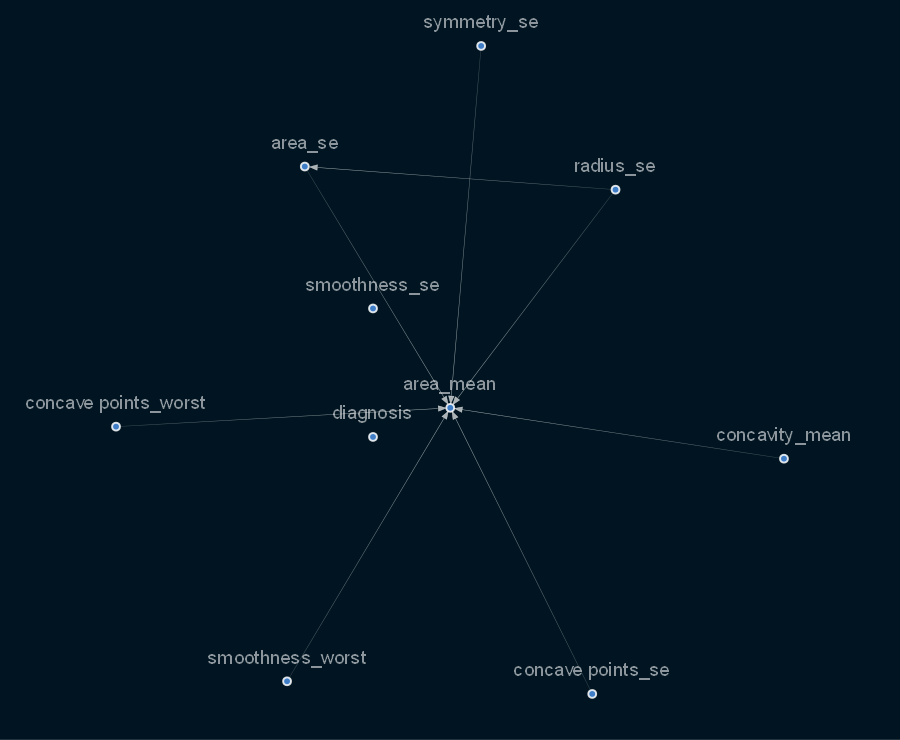

In [238]:

sm_df1 = from_pandas_lasso(df_1, tabu_parent_nodes=["diagnosis"], w_threshold=0.8,beta=0.8)
viz = plot_structure(
    sm_constrained_lasso_df_1,
    graph_attributes={"scale": "2",'size':3},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK)
Image(viz.draw(format='png'))

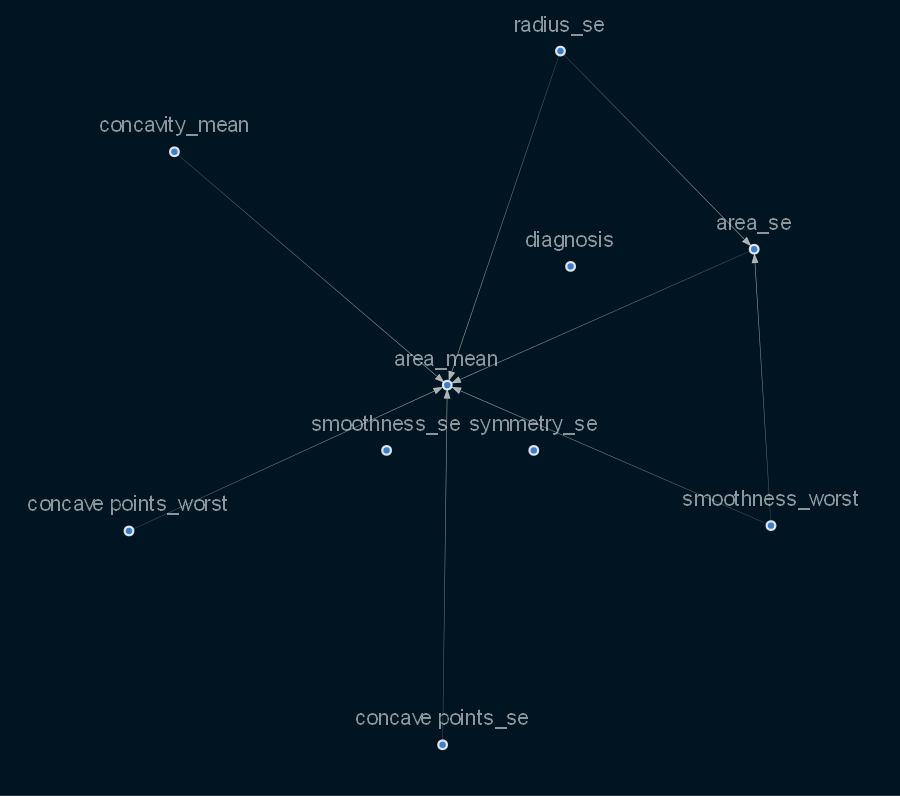

In [239]:

sm_df2 = from_pandas_lasso(df_2, tabu_parent_nodes=['diagnosis'], w_threshold=0.8, beta=0.8)
viz = plot_structure(
    sm_df2,
    graph_attributes={"scale": "2", 'size':3},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK)
Image(viz.draw(format='png'))

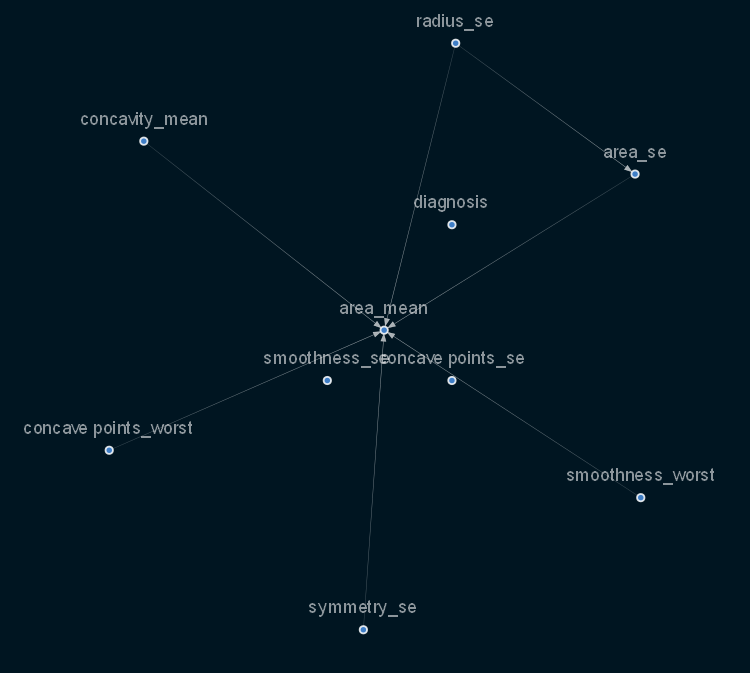

In [232]:
sm_df3 = from_pandas_lasso(df_3, tabu_parent_nodes=['diagnosis'], w_threshold=0.8, beta=0.8)
viz = plot_structure(
    sm_df3,
    graph_attributes={"scale": "2.0", 'size':2.5},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK)
Image(viz.draw(format='png'))

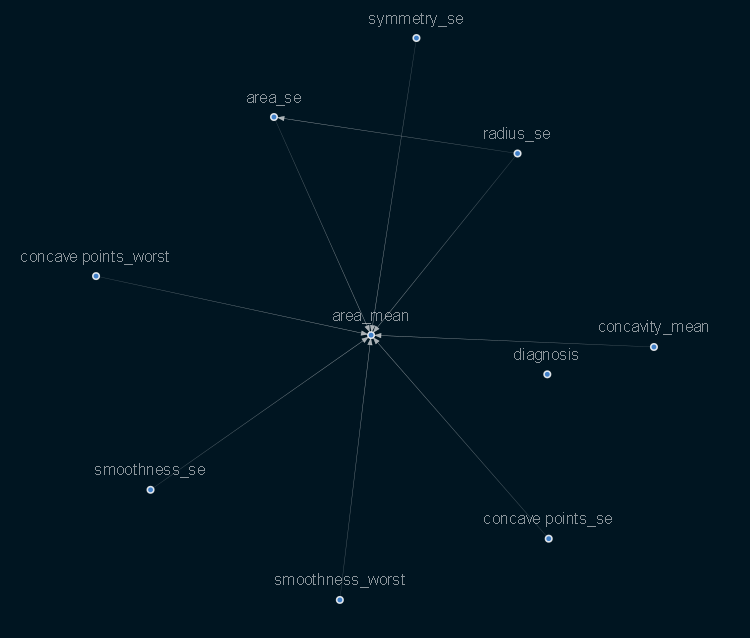

In [220]:
sm_df4 = from_pandas_lasso(df_4, tabu_parent_nodes=['diagnosis'], w_threshold=0.8, beta=0.8)
viz = plot_structure(
    sm_df3,
    graph_attributes={"scale": "2.0", 'size':2.5},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK)
Image(viz.draw(format='png'))

## Comparaison

In [240]:
# similarity between df_1 and ground truth(training data)
jaccard_similarity(sm_df1.edges(), sm_lasso_constrained.edges())

0.7

In [241]:
# similarity between df_2 and ground truth(training data)
jaccard_similarity(sm_df2.edges(), sm_lasso_constrained.edges())

0.636

In [242]:
# similarity between df_3 and ground truth(training data)
jaccard_similarity(sm_df3.edges(), sm_lasso_constrained.edges())

0.7

In [243]:
# similarity between df_4 and ground truth(training data)
jaccard_similarity(sm_df4.edges(), sm_lasso_constrained.edges())

0.8

As conclusion using jaccard_similarity, we can say that, by increasing the size of the data, our   grouth truth (training data) are 90%similar to the real data(full data), which great despite the randomization effect during the selection of the traning data.

C:\Users\hp\anaconda3\lib\site-packages\pygraphviz\agraph.py:1367: RuntimeWarning: Warning: node 'concave points_worst', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)
C:\Users\hp\anaconda3\lib\site-packages\pygraphviz\agraph.py:1367: RuntimeWarning: Warning: node 'concave points_worst', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


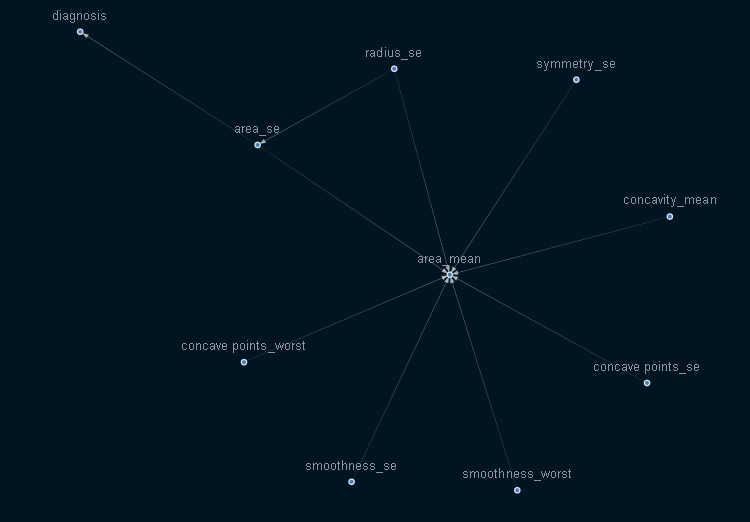

In [244]:
sm_lasso_constrained = from_pandas_lasso(data4,tabu_parent_nodes=['diagnosis'] ,w_threshold=0.8, beta=0.8)


viz = plot_structure(
    sm_lasso_constrained,
    graph_attributes={"scale": "2.0", 'size':2.5},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK)
Image(viz.draw(format='png'))

### Area_se has a direct effect on Diagnosis and Radius is an confounding  feature  for Area_se.

# Conditional Distribution of the Bayesian Network
Bayesian Networks in CausalNex support only discrete distributions. Any continuous features, or features with a large number of categories, should be discretised prior to fitting the Bayesian Network. Models containing variables with many possible values will typically be badly fit, and exhibit poor performance.

In [499]:
bn = BayesianNetwork(sm_lasso_constrained)
#blanket = get_markov_blanket(bn, 'diagnosis')
#edge_list = list(blanket.structure.edges)
#edge_list

In [350]:
from causalnex.network import BayesianNetwork
from causalnex.discretiser import Discretiser

#from causalnex.discretiser import Discretiser
discretised_data=data4.copy()
for column in discretised_data.columns:
    discretised_data[column] = Discretiser(method="uniform",num_buckets=10,
                          numeric_split_points=[1, 10]).transform(discretised_data[column].values)
discretised_data

,concave points_worst,concave points_se,symmetry_se,radius_se,concavity_mean,smoothness_worst,smoothness_se,area_mean,area_se,diagnosis
10,0,0,0,0,0,0,0,2,2,1
81,0,0,0,0,0,0,0,2,2,0
378,0,0,0,0,0,0,0,2,2,0
207,0,0,0,0,0,0,0,2,2,1
401,0,0,0,0,0,0,0,2,2,0
...,...,...,...,...,...,...,...,...,...,...
546,0,0,0,0,0,0,0,2,2,0
49,0,0,0,0,0,0,0,2,2,0
141,0,0,0,0,0,0,0,2,2,1
34,0,0,0,0,0,0,0,2,2,1


In [351]:
for column in discretised_data.columns:
    unique_values=discretised_data[column].unique()
    print(column,unique_values)

concave points_worst [0]
concave points_se [0]
symmetry_se [0]
radius_se [0 1]
concavity_mean [0]
smoothness_worst [0]
smoothness_se [0]
area_mean [2]
area_se [2 1]
diagnosis [1 0]


In [352]:
# Create labels for the the diagnosis column
diagnosis_map = {0: "Benign", 1: "Malignant"}
discretised_data["diagnosis"] = discretised_data["diagnosis"].map(diagnosis_map)

discretised_data.head()

,concave points_worst,concave points_se,symmetry_se,radius_se,concavity_mean,smoothness_worst,smoothness_se,area_mean,area_se,diagnosis
10,0,0,0,0,0,0,0,2,2,Malignant
81,0,0,0,0,0,0,0,2,2,Benign
378,0,0,0,0,0,0,0,2,2,Benign
207,0,0,0,0,0,0,0,2,2,Malignant
401,0,0,0,0,0,0,0,2,2,Benign


In [353]:
# Create labels for the other features column
discretised_data_new=discretised_data.copy()
discretised_data_new=discretised_data_new.iloc[:, :-1]
discretised_data_new.head()
for column in discretised_data_new.columns:
    features_map={0: "Low", 1: "Medium",2:"High"}
    discretised_data_new[column] = discretised_data_new[column].map(features_map)

diagnosis=discretised_data['diagnosis']
discretised_data_new= discretised_data_new.join(diagnosis)


In [354]:
discretised_data_new

,concave points_worst,concave points_se,symmetry_se,radius_se,concavity_mean,smoothness_worst,smoothness_se,area_mean,area_se,diagnosis
10,Low,Low,Low,Low,Low,Low,Low,High,High,Malignant
81,Low,Low,Low,Low,Low,Low,Low,High,High,Benign
378,Low,Low,Low,Low,Low,Low,Low,High,High,Benign
207,Low,Low,Low,Low,Low,Low,Low,High,High,Malignant
401,Low,Low,Low,Low,Low,Low,Low,High,High,Benign
...,...,...,...,...,...,...,...,...,...,...
546,Low,Low,Low,Low,Low,Low,Low,High,High,Benign
49,Low,Low,Low,Low,Low,Low,Low,High,High,Benign
141,Low,Low,Low,Low,Low,Low,Low,High,High,Malignant
34,Low,Low,Low,Low,Low,Low,Low,High,High,Malignant


### Split 85% train and 15% test

In [540]:
train, test = train_test_split(discretised_data_new, train_size=0.85, test_size=0.1, random_state=7)

## Fit Conditional Probability Distributions with ground truch data

In [541]:
bn = bn.fit_node_states(discretised_data_new)
bn = bn.fit_cpds(train, method="BayesianEstimator", bayes_prior="K2")

In [542]:
print(bn.cpds)

{'concave points_worst':                          
concave points_worst     
Low                   1.0, 'area_mean': area_se              High        Medium       
concave points_se     Low           Low       
concave points_worst  Low           Low       
concavity_mean        Low           Low       
radius_se             Low Medium    Low Medium
smoothness_se         Low    Low    Low    Low
smoothness_worst      Low    Low    Low    Low
symmetry_se           Low    Low    Low    Low
area_mean                                     
High                  1.0    1.0    1.0    1.0, 'concave points_se':                       
concave points_se     
Low                1.0, 'symmetry_se':                 
symmetry_se     
Low          1.0, 'radius_se':                    
radius_se          
Low        0.956416
Medium     0.043584, 'area_se': radius_se       Low    Medium
area_se                      
High       0.959596  0.947368
Medium     0.040404  0.052632, 'concavity_mean':           

In [543]:

bn.cpds["diagnosis"]

area_se,High,Medium
diagnosis,,
Benign,0.633166,0.941176
Malignant,0.366834,0.058824


We get above the conditional probability  for the diagnosis whatever the exposed level of area_se you are. It also means that knowing such prior informatio about area_se that's  the probalilty  to be diagnosis Malignant (1) or Benign(0). Area_se has a direct effect of Diagnosis.

# Model quality
To evaluate the quality of the model that has been learned, CausalNex supports two main approaches: Classification Report and Receiver Operating Characteristics (ROC) / Area Under the ROC Curve (AUC). In this section each will be discussed.

## ROC / AUC
Receiver Operating Characteristics (ROC), and the Area Under the ROC Curve (AUC) can be obtained using the roc_auc method within the CausalNex metrics module. Again, a test set and target node must be provided. The ROC curve is computed by micro-averaging predictions made across all states (classes) of the target node.

In [547]:

from causalnex.evaluation import roc_auc
roc, auc = roc_auc(bn, test, "diagnosis")
print(auc)

0.6401499375260309


The AUC value for our model is little bit high, giving us confidence in the performance.

## Classification Report for ground data
To obtain a classification report using a BN, we need to provide a test set, and the node we are trying to classify. The report will predict the target node for all rows in the test set, and evaluate how well those predictions are made.

In [544]:
from causalnex.evaluation import classification_report
classification_report(bn, test, "diagnosis")

C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'diagnosis_Benign': {'precision': 0.6326530612244898,
  'recall': 1.0,
  'f1-score': 0.775,
  'support': 31},
 'diagnosis_Malignant': {'precision': 0.0,
  'recall': 0.0,
  'f1-score': 0.0,
  'support': 18},
 'accuracy': 0.6326530612244898,
 'macro avg': {'precision': 0.3163265306122449,
  'recall': 0.5,
  'f1-score': 0.3875,
  'support': 49},
 'weighted avg': {'precision': 0.4002498958767181,
  'recall': 0.6326530612244898,
  'f1-score': 0.49030612244897964,
  'support': 49}}

This report shows that the model we have defined is able to classify 

## Accuracy of the model

In [546]:
pred = bn.predict(test, 'diagnosis')
true = test['diagnosis']
print('Accuracy: {:.2f} '.format(accuracy_score(y_true=true, y_pred=pred)))

Accuracy: 0.63 


## Fit Conditional Probability Distributions withf full data

In [525]:
#from causalnex.discretiser import Discretiser
discretised_data1=data1.copy()
for column in discretised_data1.columns:
    discretised_data1[column] = Discretiser(method="uniform",num_buckets=10,
                          numeric_split_points=[1, 10]).transform(discretised_data1[column].values)
discretised_data1

,diagnosis,concave points_worst,concave points_se,symmetry_se,radius_se,concavity_mean,smoothness_worst,smoothness_se,area_mean,area_se
0,1,0,0,0,1,0,0,0,2,2
1,1,0,0,0,0,0,0,0,2,2
2,1,0,0,0,0,0,0,0,2,2
3,1,0,0,0,0,0,0,0,2,2
4,1,0,0,0,0,0,0,0,2,2
...,...,...,...,...,...,...,...,...,...,...
564,1,0,0,0,1,0,0,0,2,2
565,1,0,0,0,0,0,0,0,2,2
566,1,0,0,0,0,0,0,0,2,2
567,1,0,0,0,0,0,0,0,2,2


In [526]:
# Create labels for the the diagnosis column
diagnosis_map1 = {0: "Benign", 1: "Malignant"}
discretised_data1["diagnosis"] = discretised_data1["diagnosis"].map(diagnosis_map1)

discretised_data1

,diagnosis,concave points_worst,concave points_se,symmetry_se,radius_se,concavity_mean,smoothness_worst,smoothness_se,area_mean,area_se
0,Malignant,0,0,0,1,0,0,0,2,2
1,Malignant,0,0,0,0,0,0,0,2,2
2,Malignant,0,0,0,0,0,0,0,2,2
3,Malignant,0,0,0,0,0,0,0,2,2
4,Malignant,0,0,0,0,0,0,0,2,2
...,...,...,...,...,...,...,...,...,...,...
564,Malignant,0,0,0,1,0,0,0,2,2
565,Malignant,0,0,0,0,0,0,0,2,2
566,Malignant,0,0,0,0,0,0,0,2,2
567,Malignant,0,0,0,0,0,0,0,2,2


In [528]:
# Create labels for the other features column
discretised_data_new1=discretised_data1.copy()
discretised_data_new1=discretised_data_new1.iloc[:, 1:]
discretised_data_new1.head()
for column in discretised_data_new1.columns:
    features_map={0: "Low", 1: "Medium",2:"High"}
    discretised_data_new1[column] = discretised_data_new1[column].map(features_map)

diagnosis=discretised_data1['diagnosis']
discretised_data_new1= discretised_data_new1.join(diagnosis)

In [529]:
discretised_data_new1

,concave points_worst,concave points_se,symmetry_se,radius_se,concavity_mean,smoothness_worst,smoothness_se,area_mean,area_se,diagnosis
0,Low,Low,Low,Medium,Low,Low,Low,High,High,Malignant
1,Low,Low,Low,Low,Low,Low,Low,High,High,Malignant
2,Low,Low,Low,Low,Low,Low,Low,High,High,Malignant
3,Low,Low,Low,Low,Low,Low,Low,High,High,Malignant
4,Low,Low,Low,Low,Low,Low,Low,High,High,Malignant
...,...,...,...,...,...,...,...,...,...,...
564,Low,Low,Low,Medium,Low,Low,Low,High,High,Malignant
565,Low,Low,Low,Low,Low,Low,Low,High,High,Malignant
566,Low,Low,Low,Low,Low,Low,Low,High,High,Malignant
567,Low,Low,Low,Low,Low,Low,Low,High,High,Malignant


In [531]:
train, test = train_test_split(discretised_data_new1, train_size=0.85, test_size=0.1, random_state=7)

In [532]:
bn1 = bn.fit_node_states(discretised_data_new1)
bn1 = bn.fit_cpds(train, method="BayesianEstimator", bayes_prior="K2")

In [533]:
bn.cpds["diagnosis"]

area_se,High,Medium
diagnosis,,
Benign,0.617521,0.947368
Malignant,0.382479,0.052632


## Classification Report for full data

In [534]:
from causalnex.evaluation import classification_report
classification_report(bn, test, "diagnosis")

C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'diagnosis_Benign': {'precision': 0.5964912280701754,
  'recall': 1.0,
  'f1-score': 0.7472527472527472,
  'support': 34},
 'diagnosis_Malignant': {'precision': 0.0,
  'recall': 0.0,
  'f1-score': 0.0,
  'support': 23},
 'accuracy': 0.5964912280701754,
 'macro avg': {'precision': 0.2982456140350877,
  'recall': 0.5,
  'f1-score': 0.3736263736263736,
  'support': 57},
 'weighted avg': {'precision': 0.355801785164666,
  'recall': 0.5964912280701754,
  'f1-score': 0.44572970888760355,
  'support': 57}}

## Accuracy for full model

In [535]:
pred = bn1.predict(test, 'diagnosis')
true = test['diagnosis']

In [536]:
print('Accuracy: {:.2f} '.format(accuracy_score(y_true=true, y_pred=pred)))

Accuracy: 0.60 


###  The model which has a great accuracy is  the Bayesian model made on the ground truth data.